# Mini Capstone Project
New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction : 
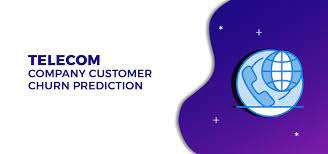
  
  
  Data set shows the data for Telco Customer Churn. It is basically related to Telecom subsribers and their regular usage.


*   It is having 33 coloumns variety of data with 7043 observations
*   Provided unique customer ID for each subscriber
*   Data is belongs to the country of US and state belongs to California with several states including different Zipcodes
*   Data also describes the Customer type like male/ female an is belongs to Senior citizen or not , having any partner and dependency /not.


**Customer account information**

1. tenure - Number of months the customer has used the service

2. Contract - The contract term of the customer

3. PaperlessBilling - Whether the customer has paperless billing or not

4. PaymentMethod - The customer’s payment method

5. MonthlyCharges - The amount charged to the customer monthly

6. TotalCharges - The total amount charged to the customer


**Services that each customer has signed up for**

1. PhoneService - Whether the customer has a phone service or not
2. MultipleLines - Whether the customer has multiple lines or not
3. InternetService - Customer’s internet service provider
4. OnlineSecurity - Whether the customer has online security or not
5. OnlineBackup - Whether the customer has online backup or not
6. DeviceProtection - Whether the customer has device protection or not
7. TechSupport - Whether the customer has tech support or not
8. StreamingTV - Whether the customer has streaming TV or not
9. StreamingMovies - Whether the customer has streaming movies or not

We can able to do analysis to achive the below goals.

**Company Goals**
Increasing profit! But how can we achieve it? Some of the way to increase profit are:

--> Acquiring new customers as much as we can
--> Retaining existing customers as much as we can

**Problems**

* Companies need to invest (expense costs) to get new customers

* When a customer leaves the service (churns), it indicates a loss of investment

* Cost, time, and effort need to be channelled to replace customers who have left the service

* Acquiring new customers is often more difficult and more expensive than retaining existing customers









# Reading Dataset

In [2]:
telco = pd.read_excel("/content/Telco_customer_churn.xlsx")
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices


### Analysing data

# **Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.**

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

From the "info" funtion we can able to find that Total Charges coloumn in Object type. It need to convert to float type.


### Data Type Conversion

In [4]:
telco['Total Charges'] = pd.to_numeric(telco['Total Charges'],errors = 'coerce') 
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   float64
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   float64
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   float64
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Coloumn number : 27-- 
Total Charges is now removed from Object type

## ***Statistical Data type Conversion: ***

In [5]:
# numerical
column_numerical = ['Count','Zip Code',  'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']

# categorical
column_categorical = list(telco.columns)
column_categorical.remove('Count')
column_categorical.remove('Zip Code')
column_categorical.remove('Latitude')
column_categorical.remove('Longitude')
column_categorical.remove('Tenure Months')
column_categorical.remove('Monthly Charges')
column_categorical.remove('Total Charges')
column_categorical.remove('Churn Value')
column_categorical.remove('Churn Score')
column_categorical.remove('CLTV')


data_type_general = dict()    #using dictionary

for col in telco.columns:     # iterating with if else loop
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})   #renaming all data frame
data_type_general

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
general data types,categorical,numerical,categorical,categorical,categorical,numerical,categorical,numerical,numerical,categorical,...,categorical,categorical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,categorical


From above all coloumns are transferred to Statistical data types in python.
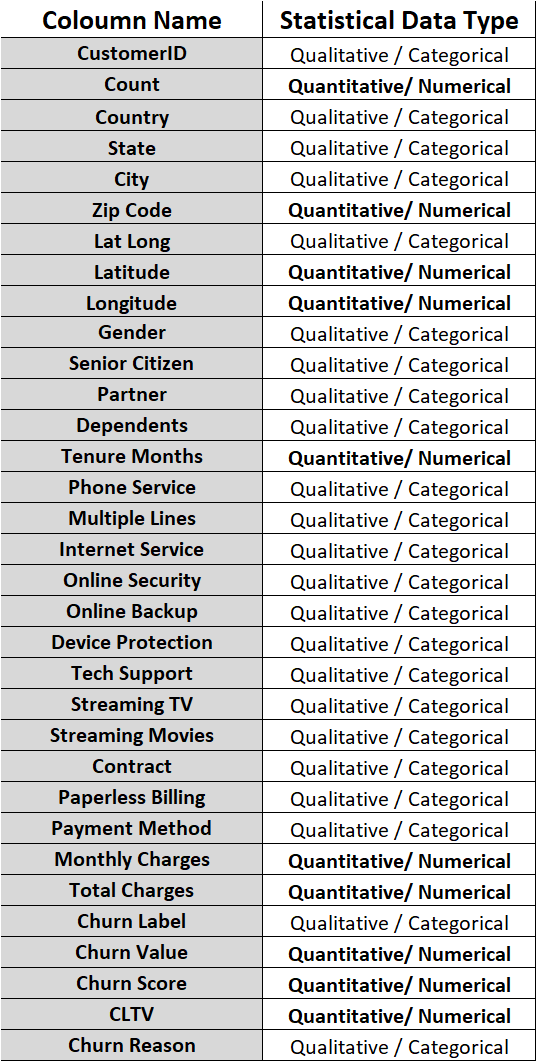

## **Python Data type conversion:**

In [6]:
data_type_python = pd.DataFrame(telco.dtypes).T.rename({0:'Python data types'})
data_type_python

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
Python data types,object,float64,object,object,object,float64,object,float64,float64,object,...,object,object,object,float64,float64,object,float64,float64,float64,object


Python data stypes 

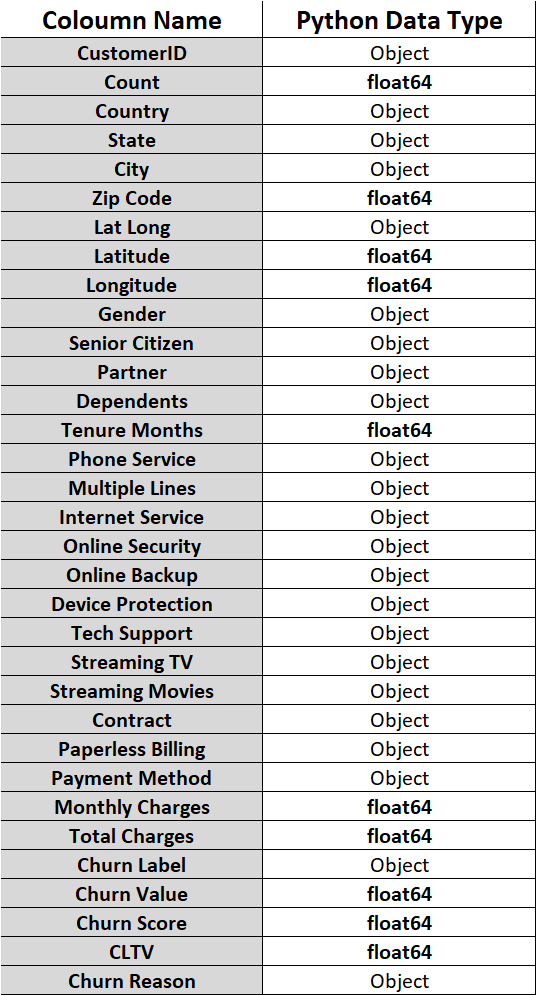

**Dealing with Missing / Null Values**

We found missing values in Total charges coloumn with 11 cells.
We can replace them by mean of coloumn

In [7]:
Average_total_charge = telco['Total Charges'].mean()
Average_total_charge
#Averaging the mean values

telco['Total Charges'].fillna(Average_total_charge, inplace =True)
#Replacing missing NaN with Mean

**Null value**

In [8]:
telco.isnull().sum()
#checking null values in each coloumn

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

No null values found, we are goot to go!

# **Q2: Please apply appropriate statistical measures using python based on data types.**

In [9]:
import statistics

telco.skew(axis = 0, skipna = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Count              0.000000
Zip Code          -0.251463
Latitude           0.303867
Longitude         -0.040792
Tenure Months      0.239540
Monthly Charges   -0.220524
Total Charges      0.962394
Churn Value        1.063031
Churn Score       -0.089840
CLTV              -0.311602
dtype: float64

In [10]:
telco.describe()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.000258,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1400.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [11]:
telco.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Count                  1.000000
Zip Code           93552.000000
Latitude              36.391777
Longitude           -119.730885
Tenure Months         29.000000
Monthly Charges       70.350000
Total Charges       1400.550000
Churn Value            0.000000
Churn Score           61.000000
CLTV                4527.000000
dtype: float64

# Exaplanation of Statistical terms

1. Mean : It shows the average of all values. 
2. Median: It shows the middle number of all values.
3. Std: It called as stadard deviation of all values.
4. min: It is the minimum number of value of all values.
5. max: It is the maximum number of value of all values.
6. 25 %: It is the 25th percentile of the data distribution.
7. 50 %: It is the 50th percentile of the data distribution.
8. 75 %: It is the 75th percentile of the data distribution.

We can see the values above.

Count coloumn is not valid as it is having same values throughout data set.




# **Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.**

Calculation of Percentage : It is a fractional part out of 100.


In [12]:
Gender_count = telco['Gender'].value_counts(dropna =False)
print(Gender_count)
#checking how many Male and Female

Senior_citizen_count = telco['Senior Citizen'].value_counts()
print(Senior_citizen_count)
#checking how many Yes and No for Senior Citizen

Male      3555
Female    3488
Name: Gender, dtype: int64
No     5901
Yes    1142
Name: Senior Citizen, dtype: int64


In [ ]:
x= 100 * telco['Gender'].value_counts() / len(telco['Gender'])
x

#calculation for Gender% 

Male      50.47565
Female    49.52435
Name: Gender, dtype: float64

**Plot for Gender %**

In [13]:
plt.pie (x, labels= x.index, shadow=True)
plt.show()

NameError: ignored

In [ ]:
y= 100 * telco['Senior Citizen'].value_counts() / len(telco['Senior Citizen'])

#calculation for Senior Citizen %

**Plot for Senior Citizen %**

In [14]:
plt.pie (y, labels= y.index, shadow=True)
#pie plot shows the lease filling area for Yes- Senior Citizen %. It means more younger generations are using telecom services.


NameError: ignored

# **Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.**

Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Tenure Months')

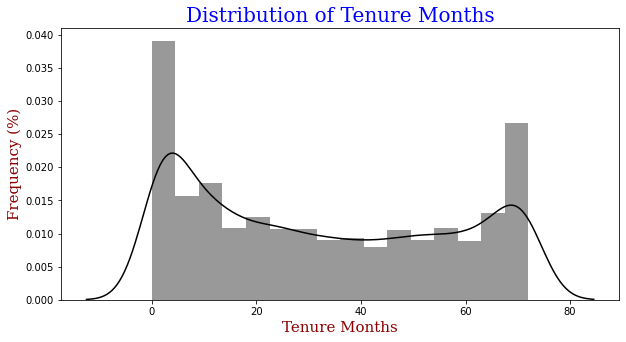

In [15]:
plt.figure(figsize=(10,5))   #defining the figure size

font1 = {'family':'serif','color':'blue','size':20}   #Giving font styles for graph
font2 = {'family':'serif','color':'darkred','size':15} #Giving font styles for graph

sns.distplot(telco['Tenure Months'],color = 'Black')  #Distribution plot to see rating with blue color

plt.xlabel('Tenure Months',fontdict = font2)
plt.ylabel('Frequency (%)',fontdict = font2)
plt.title('Distribution of Tenure Months',fontdict = font1)  # printing title


Explanation of Distribution:
Data is normally distributed. It has no Skewness. 
Skewness: 0.23

In [16]:
import scipy.stats as stats

#importing the stats 

print(stats.skew(telco['Tenure Months'])) # for printing skewness

0.2394887299846216


If skewness is less than -1 or greater than 1, 
    
*   the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, 
    
*   the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, 
    
*   the distribution is approximately symmetric.


**For the coloumn : Tenure Months- Skewness = 0.23 is "Symmetrical"**

# **Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.**

In [17]:

telco1= telco.replace( to_replace ='Yes', value=1)
telco2= telco1.replace(to_replace='No', value=0)
telco2

#Replace function used to replace the cell values with required values

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99.65,820.50,1,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,1,Mailed check,84.80,1990.50,0,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,1,Electronic check,29.60,346.45,0,0.0,59.0,2793.0,NaN


### Now the data is changed from Yes and No to 1 and 0

In [18]:
telco3= telco2.replace( to_replace ='Male', value=1)
telco4= telco3.replace( to_replace ='Yes', value=1)
telco4

#Replace function used to replace the cell values with required values

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,1,Electronic check,99.65,820.50,1,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,1,Electronic check,104.80,3046.05,1,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,1,...,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1,1.0,89.0,5340.0,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1.0,United States,California,Landers,92285.0,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,1,Bank transfer (automatic),21.15,1419.40,0,0.0,45.0,5306.0,NaN
7039,6840-RESVB,1.0,United States,California,Adelanto,92301.0,"34.667815, -117.536183",34.667815,-117.536183,1,...,One year,1,Mailed check,84.80,1990.50,0,0.0,59.0,2140.0,NaN
7040,2234-XADUH,1.0,United States,California,Amboy,92304.0,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,71.0,5560.0,NaN
7041,4801-JZAZL,1.0,United States,California,Angelus Oaks,92305.0,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,1,Electronic check,29.60,346.45,0,0.0,59.0,2793.0,NaN


### Now the entire data has been changed from Male with 1 and Female with 0

# ***Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also. ***

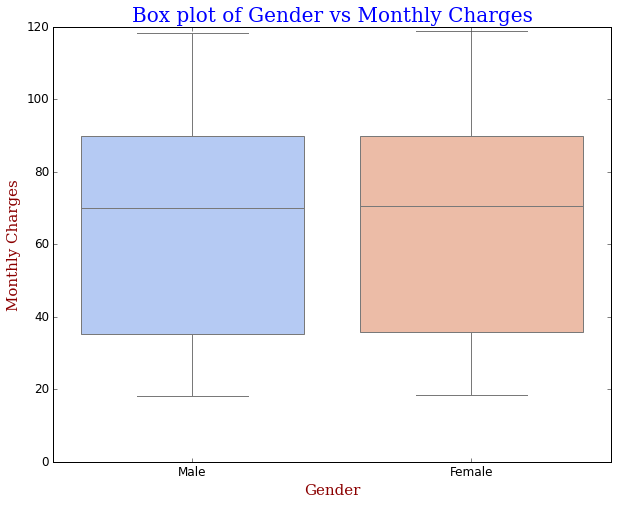

In [19]:
plt.figure(figsize = (10,8)) #defining the figure size

plt.style.use(['classic'])

sns.boxplot(x=telco['Gender'], y=telco['Monthly Charges'], data = telco, palette = 'coolwarm')


font1 = {'family':'serif','color':'blue','size':20}   #Giving font styles for graph
font2 = {'family':'serif','color':'darkred','size':15} #Giving font styles for graph

plt.xlabel('Gender', fontdict = font2)  #xlabel
plt.ylabel('Monthly Charges',fontdict = font2)     #ylabel
plt.title('Box plot of Gender vs Monthly Charges',fontdict = font1)  #Title

plt.show()

**Distribution: When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left).**
Both Male and Female are behaving in the similary way for monthly charges

# **Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.**

In [20]:
# It can be done by indexing method
telco.loc[0: ,'Total Charges'].min()

18.8

### ***Minimum Total Charges = 18.8 ***

In [21]:
  Max_index_value = telco['Total Charges'].idxmax()
  Max_index_value
#finding the maximum index value to get location of Total charges

1206

In [22]:
telco.loc[1206,'Total Charges']  
#With respect to max index value 

8684.8

In [23]:
telco.loc[1206,"Zip Code"]
#With respect Zip code

95519.0

# Min of Total Charges = 18.8 for city = Los Angels
# Max of Total charges = 8684.8 where ZIP code = 95519

# **Q8: Please find which payment method has the highest churn score and which has the lowest churn score.**

In [24]:
Max_Value_Index = telco['Churn Score'].idxmax()
print('Max_Value_Index:', Max_Value_Index)
#Finding and printing the max index

Min_Value_Index = telco['Churn Score'].idxmin()
print('Min_Value_Index:', Min_Value_Index)
#Finding and printing the min index

Max_Value_Index: 6
Min_Value_Index: 2148


In [25]:
Highest_Churn_Score_Payment_Method = telco.loc[6,'Payment Method']
print('Highest_Churn_Score_Payment_Method:-', Highest_Churn_Score_Payment_Method )
#Printing with respect to max index

Lowest_Churn_Score_Payment_Method= telco.loc[2148,'Payment Method']
print('Lowest_Churn_Score_Payment_Method:-', Lowest_Churn_Score_Payment_Method)
#Printing with respect to min index

Highest_Churn_Score_Payment_Method:- Electronic check
Lowest_Churn_Score_Payment_Method:- Credit card (automatic)


**Highest churn score Payment Method = 152756 which is Electrnic check
Lowest churn score Payment Method  = 83989 which is Credit card(Automatic)**

Note: Company need to increase the payment methods by providing more awarenesss to customers for electronic check 

# **Q9: Please create an appropriate plot to check the count of payment methods and explain it.**

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

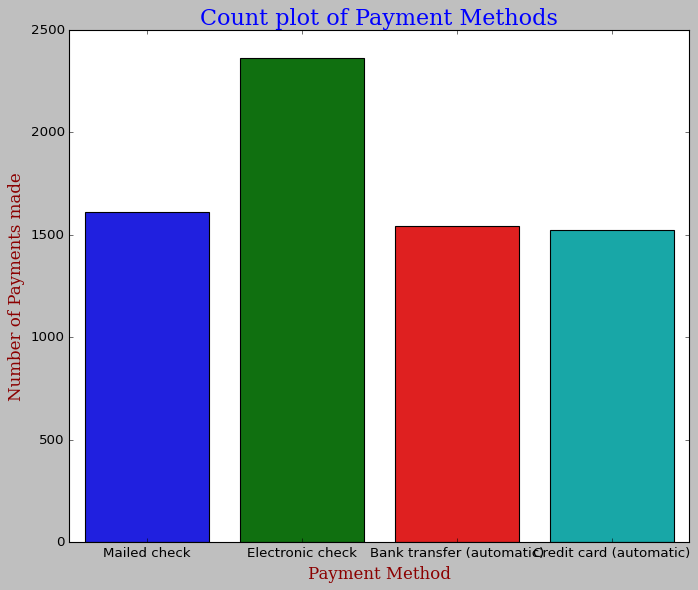

In [26]:
plt.figure(figsize = (10,8)) #defining the figure size

plt.style.use(['classic'])

sns.countplot(x='Payment Method', data= telco)  #countplot

font1 = {'family':'serif','color':'blue','size':20}   #Giving font styles for graph
font2 = {'family':'serif','color':'darkred','size':15} #Giving font styles for graph

plt.xlabel('Payment Method', fontdict = font2)  #xlabel
plt.ylabel('Number of Payments made',fontdict = font2)     #ylabel
plt.title('Count plot of Payment Methods',fontdict = font1)  #Title

telco['Payment Method'].value_counts()



* Electronic check                 2365
* Mailed check                     1612
* Bank transfer (automatic)        1544
* Credit card (automatic)          1522

** We can say from Electronic Check most payments happended.
Suggestion: Company need to spread the benefits of using electronic check and convert the credit and bank payments to electronic check.** 

# **Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation Between Monthly charges and Total charges')

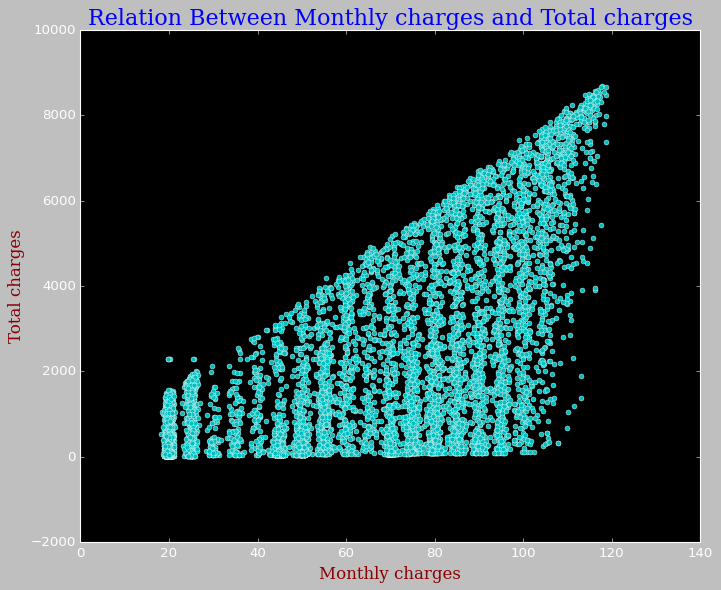

In [27]:
plt.figure(figsize = (10,8)) #defining the figure size
plt.style.use(['dark_background'])  # defining style


sns.scatterplot(telco['Monthly Charges'],telco['Total Charges'],color = 'c') #Scatter plot

font1 = {'family':'serif','color':'blue','size':20}   #Giving font styles for graph
font2 = {'family':'serif','color':'darkred','size':15} #Giving font styles for graph

plt.xlabel('Monthly charges', fontdict = font2)  #xlabel
plt.ylabel('Total charges',fontdict = font2)     #ylabel
plt.title('Relation Between Monthly charges and Total charges',fontdict = font1)  #Title



we could see it has positive correlation 

**Positive Correlation: both variables change in the same direction.**